In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('avg_degree_Total_SQA_Rand_20_15_10_MA_PPG_012_segments.txt','r') as f:
    dataset=f.readlines()

In [3]:
len(dataset)

100000

In [7]:
degree_clean=[float(i) for i in dataset[:50000]]
degree_noise=[float(i) for i in dataset[50000:]]

In [9]:
# with open('avg_degree_noisy2.txt','r') as f:
#     degree_noisy=f.readlines()
# degree_noisy=[float(i) for i in degree_noisy]

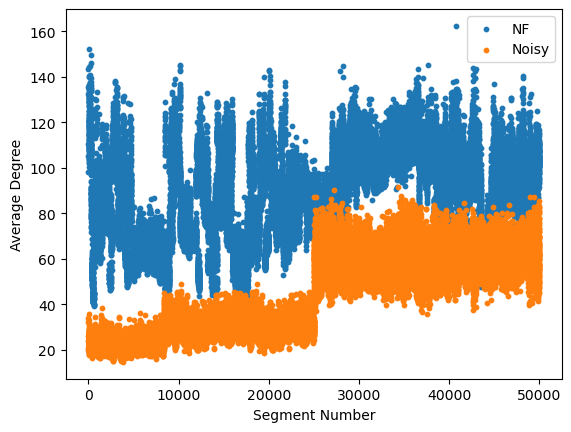

In [13]:
l = [i for i in range(len(degree_clean))]

# Plot the scatter plots
plt.scatter(l[:50000], degree_clean, label='NF', s=10)
plt.scatter([i for i in range(len(degree_noise))][:50000], degree_noise, label='Noisy', s=10)
plt.xlabel('Segment Number')
plt.ylabel('Average Degree')
plt.legend()

# Save the figure before showing it
plt.savefig('average_degree_comparison_22222.pdf', bbox_inches='tight')
plt.show()


In [23]:
data1=[[i,1] for i in degree_clean]
data2=[[i,0] for i in degree_noise]
data=data1+data2

In [25]:
import random
random.shuffle(data)
#data

In [27]:
data_train=data[:round(0.75*len(data))]
data_test=data[round(0.75*len(data)):]

In [29]:
#data_train

In [31]:
train_data_x=[i[0] for i in data_train]
train_data_y=[i[1] for i in data_train]
#test_data_x=[i[0] for i in data_test]
#test_data_y=[i[1] for i in data_test]

In [33]:
#uhfiuwrhgoueghtoi

# False alarm reduction

In [73]:
with open('Average_Degree_Motion_Artifact_LNH_012_PPG_segments.txt','r') as f:
    dataset=f.readlines()

In [75]:
len(dataset)

5000

In [77]:
degree_clean1=[float(i) for i in dataset[0:1000]]
degree_clean2=[float(i) for i in dataset[1500:2500]]
degree_clean3=[float(i) for i in dataset[3000:4500]]
degree_clean11=degree_clean1+degree_clean2+degree_clean3

In [79]:
len(degree_clean11)

3500

In [81]:
degree_noise1=[float(i) for i in dataset[1000:1500]]
degree_noise2=[float(i) for i in dataset[2500:3000]]
degree_noise3=[float(i) for i in dataset[4500:5000]]
degree_noise00=degree_noise1+degree_noise2+degree_noise3

In [45]:
len(degree_noise00)

1500

In [47]:
data11=[[i,1] for i in degree_clean11]
data01=[[i,0] for i in degree_noise00]
data10=data11+data01

In [49]:
test_data_x=[i[0] for i in data10]
test_data_y=[i[1] for i in data10]

# ML Models

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy: 0.93
Training Time (Grid Search): 11.4704s
Testing Time: 0.0000s
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy: 0.93
Training Time (Grid Search): 11.1908s
Testing Time: 0.0000s
Trained Model Size: 0.66 KB

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 83.72   95.33     89.15  150000.00
1                 97.87   92.06     94.88  350000.00
accuracy          93.04    0.93      0.93       0.93
macro avg          0.91    0.94      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1430   70]
 [ 278 3222]]


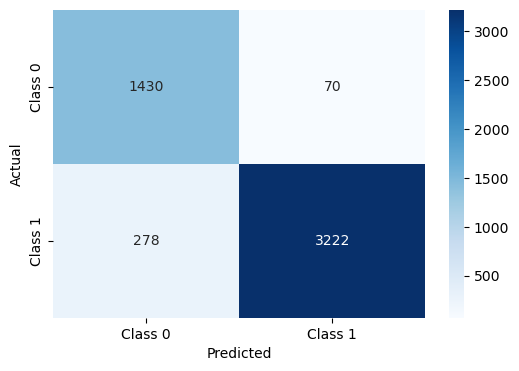


Classification Report (in percentages):
              precision  recall  f1-score    support
0                 83.72   95.33     89.15  150000.00
1                 97.87   92.06     94.88  350000.00
accuracy          93.04    0.93      0.93       0.93
macro avg          0.91    0.94      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1430   70]
 [ 278 3222]]


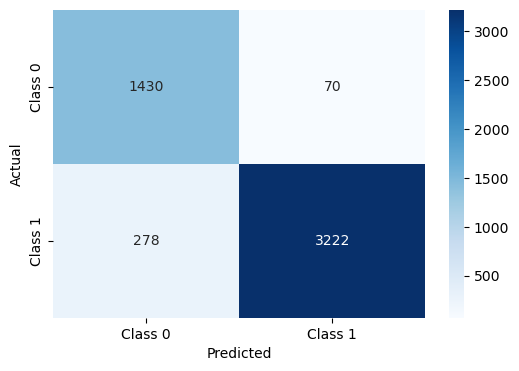

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'solver': ['lbfgs', 'liblinear'],     # Solvers for optimization
    'max_iter': [100, 200, 500]           # Maximum number of iterations
}

# Initialize the Logistic Regression model
logistic = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To calculate the model size

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'solver': ['lbfgs', 'liblinear'],     # Solvers for optimization
    'max_iter': [100, 200, 500]           # Maximum number of iterations
}

# Initialize the Logistic Regression model
logistic = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
#plt.title("Confusion Matrix - Logistic Regression (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
#plt.title("Confusion Matrix - Logistic Regression (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Trained model saved as 'trained_decision_tree_model.pkl'
Trained Model Size: 5.55 KB
Accuracy: 0.93
Training Time (Grid Search): 38.5776s
Testing Time: 0.0000s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 80.93   99.33     89.19  150000.00
1                 99.68   89.97     94.58  350000.00
accuracy          92.78    0.93      0.93       0.93
macro avg          0.90    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1490   10]
 [ 351 3149]]


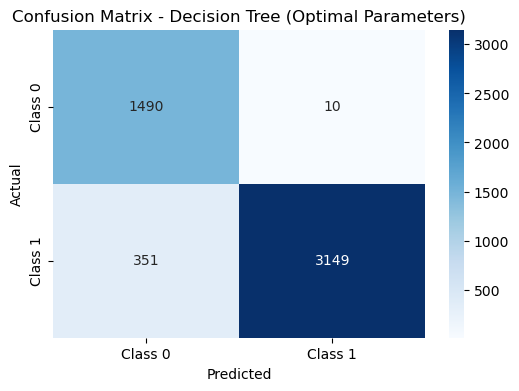

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],      # Splitting criteria
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5]         # Minimum samples required at a leaf node
}

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_decision_tree_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Decision Tree (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.93
Training Time (Grid Search): 229.3335s
Testing Time: 0.0222s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.97   99.13     89.74  150000.00
1                 99.59   90.66     94.91  350000.00
accuracy          93.20    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1487   13]
 [ 327 3173]]


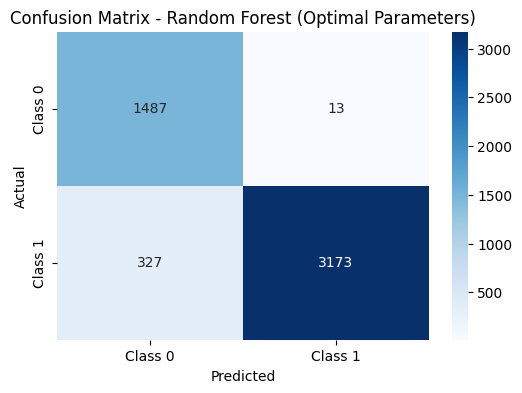

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']         # Splitting criteria
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Random Forest (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Trained model saved as 'trained_random_forest_model.pkl'
Trained Model Size: 7231.10 KB
Accuracy: 0.93
Training Time (Grid Search): 3261.4065s
Testing Time: 0.0833s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.79   98.80     89.49  150000.00
1                 99.44   90.57     94.80  350000.00
accuracy          93.04    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1482   18]
 [ 330 3170]]


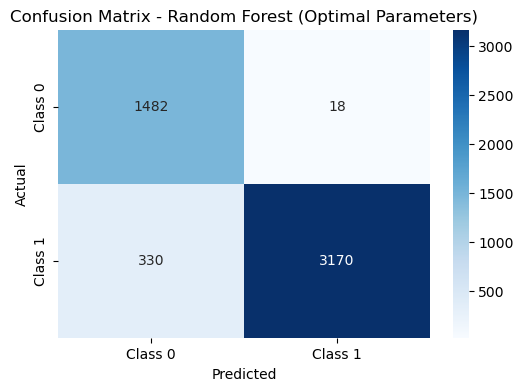

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']         # Splitting criteria
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_random_forest_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Random Forest (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Accuracy: 0.92
Training Time (Grid Search): 209.3275s
Testing Time: 0.0099s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 79.57   99.73     88.52  150000.00
1                 99.87   89.03     94.14  350000.00
accuracy          92.24    0.92      0.92       0.92
macro avg          0.90    0.94      0.91    5000.00
weighted avg       0.94    0.92      0.92    5000.00

Confusion Matrix:
[[1496    4]
 [ 384 3116]]


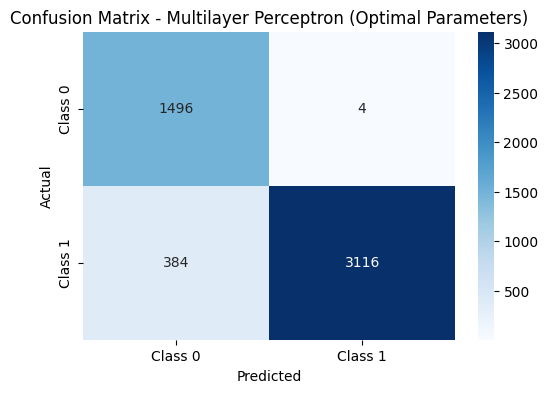

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],   # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],              # Activation functions
    'solver': ['adam', 'sgd'],                               # Solvers for weight optimization
    'learning_rate': ['constant', 'adaptive'],               # Learning rate strategies
    'max_iter': [200, 500]                                   # Maximum number of iterations
}

# Initialize the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Multilayer Perceptron (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Trained model saved as 'trained_mlp_model.pkl'
Trained Model Size: 7.10 KB
Accuracy: 0.93
Training Time (Grid Search): 1422.4503s
Testing Time: 0.0000s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 82.19   99.07     89.84  150000.00
1                 99.56   90.80     94.98  350000.00
accuracy          93.28    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1486   14]
 [ 322 3178]]


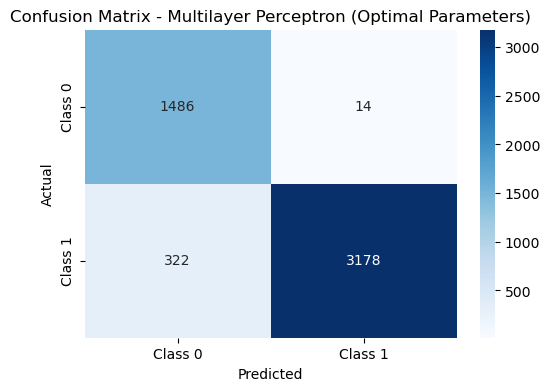

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],   # Number of neurons in hidden layers
    'activation': ['relu', 'tanh', 'logistic'],              # Activation functions
    'solver': ['adam', 'sgd'],                               # Solvers for weight optimization
    'learning_rate': ['constant', 'adaptive'],               # Learning rate strategies
    'max_iter': [200, 500]                                   # Maximum number of iterations
}

# Initialize the MLP Classifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_mlp_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Multilayer Perceptron (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.92
Training Time (Grid Search): 7.0231s
Testing Time: 0.1783s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 80.86   96.07     87.81  150000.00
1                 98.17   90.26     94.05  350000.00
accuracy          92.00    0.92      0.92       0.92
macro avg          0.90    0.93      0.91    5000.00
weighted avg       0.93    0.92      0.92    5000.00

Confusion Matrix:
[[1441   59]
 [ 341 3159]]


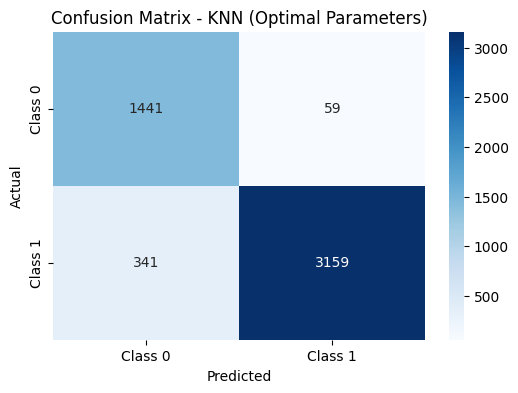

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 10],              # Number of neighbors
    'weights': ['uniform', 'distance'],       # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]                               # Power parameter for Minkowski metric
}

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - KNN (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Trained model saved as 'trained_knn_model.pkl'
Trained Model Size: 1950.93 KB
Accuracy: 0.92
Training Time (Grid Search): 21.8135s
Testing Time: 0.1667s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.69   95.47     88.04  150000.00
1                 97.91   90.83     94.23  350000.00
accuracy          92.22    0.92      0.92       0.92
macro avg          0.90    0.93      0.91    5000.00
weighted avg       0.93    0.92      0.92    5000.00

Confusion Matrix:
[[1432   68]
 [ 321 3179]]


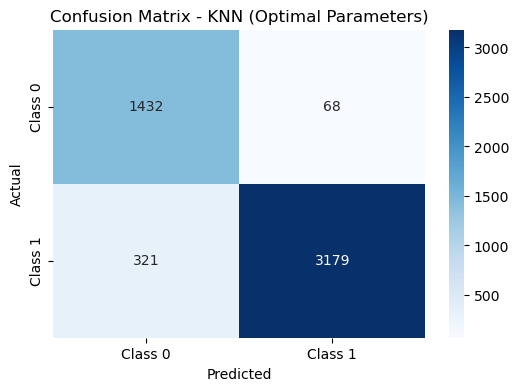

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 10],              # Number of neighbors
    'weights': ['uniform', 'distance'],       # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]                               # Power parameter for Minkowski metric
}

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_knn_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - KNN (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Accuracy: 0.93
Training Time (Grid Search): 40.0946s
Testing Time: 0.0544s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 82.10   99.07     89.79  150000.00
1                 99.56   90.74     94.95  350000.00
accuracy          93.24    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1486   14]
 [ 324 3176]]


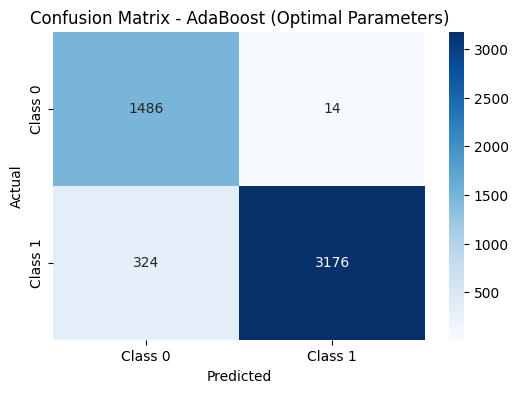

In [131]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1],   # Learning rate
    'base_estimator__max_depth': [1, 3, 5]  # Depth of the base estimator (Decision Tree)
}

# Initialize the AdaBoost Classifier with a Decision Tree as the base estimator
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - AdaBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100}
Trained model saved as 'trained_adaboost_model.pkl'
Trained Model Size: 148.31 KB
Accuracy: 0.93
Training Time (Grid Search): 279.8351s
Testing Time: 0.0493s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.84   99.13     89.66  150000.00
1                 99.59   90.57     94.87  350000.00
accuracy          93.14    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1487   13]
 [ 330 3170]]


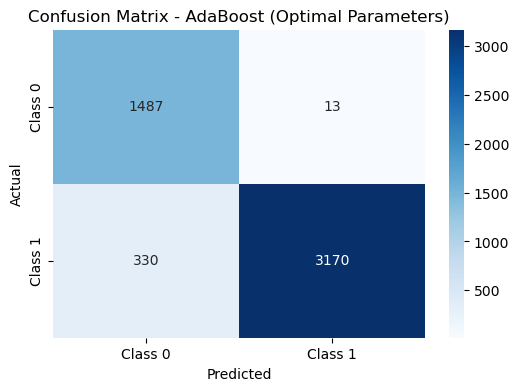

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1],   # Learning rate
    'base_estimator__max_depth': [1, 3, 5]  # Depth of the base estimator (Decision Tree)
}

# Initialize the AdaBoost Classifier with a Decision Tree as the base estimator
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_adaboost_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - AdaBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'base_estimator__max_depth': 5, 'bootstrap': True, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}
Accuracy: 0.93
Training Time (Grid Search): 89.4146s
Testing Time: 0.0347s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.97   99.13     89.74  150000.00
1                 99.59   90.66     94.91  350000.00
accuracy          93.20    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1487   13]
 [ 327 3173]]


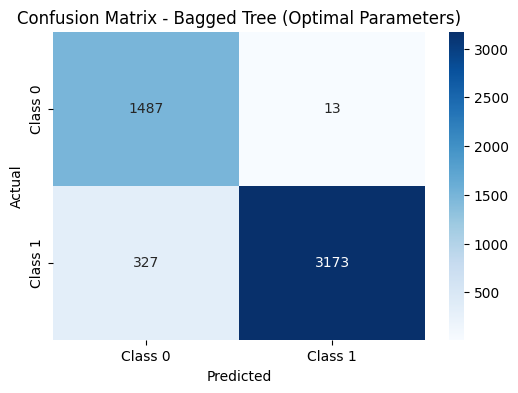

In [146]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the ensemble
    'base_estimator__max_depth': [None, 5, 10],  # Maximum depth of the base decision trees
    'max_samples': [0.8, 1.0],               # Fraction of samples for training each tree
    'max_features': [0.8, 1.0],              # Fraction of features for training each tree
    'bootstrap': [True, False],              # Whether to use bootstrapping
}

# Initialize the Bagged Tree Classifier with Decision Tree as the base estimator
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagged_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Bagged Tree (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'base_estimator__max_depth': 5, 'bootstrap': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}
Trained model saved as 'trained_bagged_tree_model.pkl'
Trained Model Size: 492.78 KB
Accuracy: 0.93
Training Time (Grid Search): 943.6704s
Testing Time: 0.0349s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.70   99.13     89.58  150000.00
1                 99.59   90.49     94.82  350000.00
accuracy          93.08    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1487   13]
 [ 333 3167]]


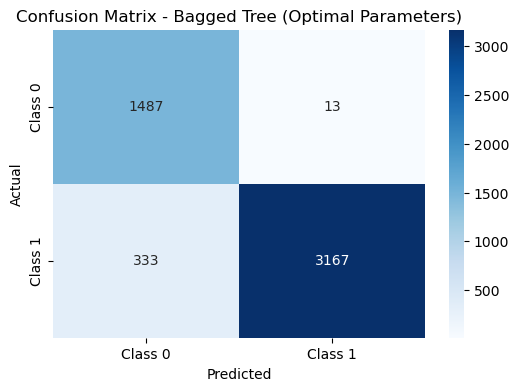

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the ensemble
    'base_estimator__max_depth': [None, 5, 10],  # Maximum depth of the base decision trees
    'max_samples': [0.8, 1.0],               # Fraction of samples for training each tree
    'max_features': [0.8, 1.0],              # Fraction of features for training each tree
    'bootstrap': [True, False],              # Whether to use bootstrapping
}

# Initialize the Bagged Tree Classifier with Decision Tree as the base estimator
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagged_tree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_bagged_tree_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Bagged Tree (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\iitbbs\anaconda3\Lib\site-packa

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Trained model saved as 'trained_xgb_model.pkl'
Trained Model Size: 228.36 KB
Accuracy: 0.93
Training Time (Grid Search): 65.1366s
Testing Time: 0.0000s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 81.75   99.13     89.61  150000.00
1                 99.59   90.51     94.84  350000.00
accuracy          93.10    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1487   13]
 [ 332 3168]]


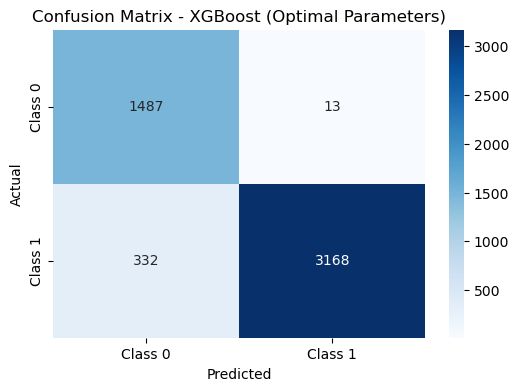

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # To save the trained model

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],         # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (eta)
    'subsample': [0.8, 1.0],        # Fraction of samples to grow trees
}

# Initialize the XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Avoid deprecation warnings
    eval_metric='logloss'     # Evaluation metric
)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Save the trained model to a file
model_file_name = 'trained_xgb_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Trained model saved as '{model_file_name}'")

# **Calculate model size**
model_bytes = pickle.dumps(best_model)  # Serialize the model
model_size_kb = len(model_bytes) / 1024  # Convert to kilobytes
print(f"Trained Model Size: {model_size_kb:.2f} KB")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - XGBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.93
Training Time: 0.1265s
Testing Time: 0.0007s

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1500
           1       0.98      0.92      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.91      0.94      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


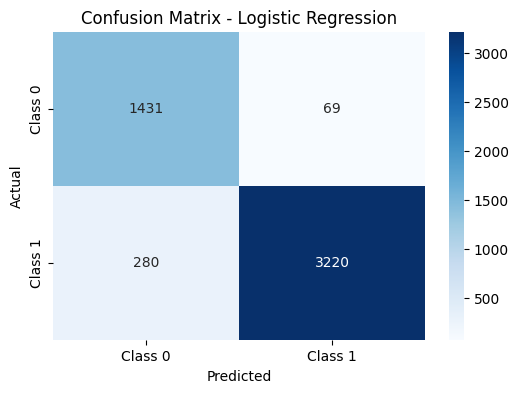

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Initialize Logistic Regression Classifier
logistic = LogisticRegression(solver='lbfgs', max_iter=200)

# Train the Logistic Regression model
t1 = time.time()
logistic_model = logistic.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_logistic = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = logistic_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_logistic = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_logistic:.4f}s")
print(f"Testing Time: {time_test_logistic:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.93
Training Time: 0.0869s
Testing Time: 0.0013s

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1500
           1       0.99      0.90      0.94      3500

    accuracy                           0.93      5000
   macro avg       0.90      0.94      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


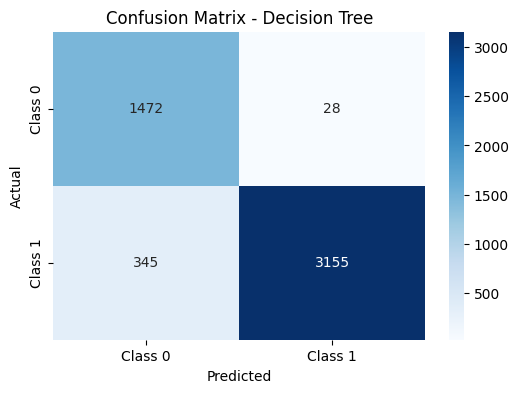

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the Decision Tree model
t1 = time.time()
dt_model = decision_tree.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_dt = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = dt_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_dt = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_dt:.4f}s")
print(f"Testing Time: {time_test_dt:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.93
Training Time: 5.2064s
Testing Time: 0.0418s

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1500
           1       0.99      0.91      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.91      0.95      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


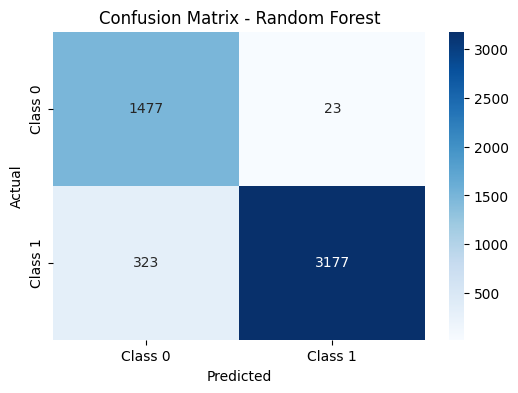

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model
t1 = time.time()
rf_model = random_forest.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_rf = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = rf_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_rf = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_rf:.4f}s")
print(f"Testing Time: {time_test_rf:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.93
Training Time: 3.5292s
Testing Time: 0.0019s

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1500
           1       0.98      0.92      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.91      0.94      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


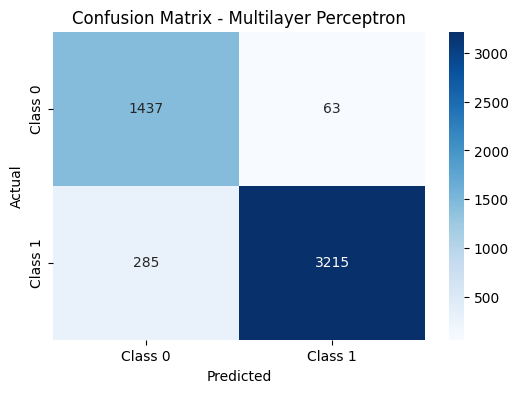

In [84]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200, random_state=42)

# Train the MLP model
t1 = time.time()
mlp_model = mlp.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_mlp = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = mlp_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_mlp = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_mlp:.4f}s")
print(f"Testing Time: {time_test_mlp:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Multilayer Perceptron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.90
Training Time: 0.0386s
Testing Time: 0.1905s

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1500
           1       0.94      0.92      0.93      3500

    accuracy                           0.90      5000
   macro avg       0.88      0.89      0.88      5000
weighted avg       0.90      0.90      0.90      5000


Confusion Matrix:


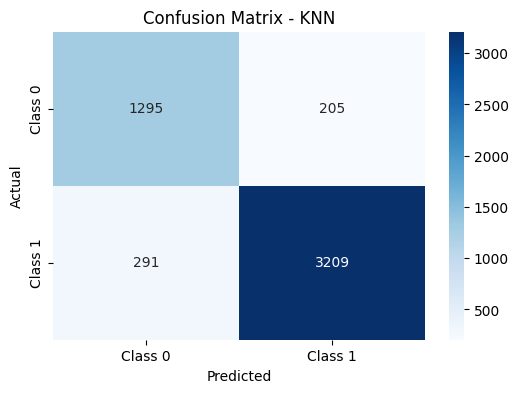

In [85]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
t1 = time.time()
knn_model = knn.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_knn = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = knn_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_knn = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_knn:.4f}s")
print(f"Testing Time: {time_test_knn:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.93
Training Time: 41.6620s
Testing Time: 0.0685s

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1500
           1       1.00      0.91      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.91      0.95      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


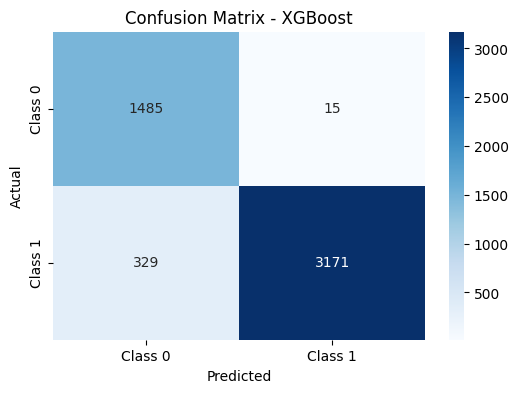

In [86]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
t1 = time.time()
xgb_model = xgb.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_xgb = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = xgb_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_xgb = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_xgb:.4f}s")
print(f"Testing Time: {time_test_xgb:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.93
Training Time: 2.0087s
Testing Time: 0.0502s

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1500
           1       1.00      0.90      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.90      0.95      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


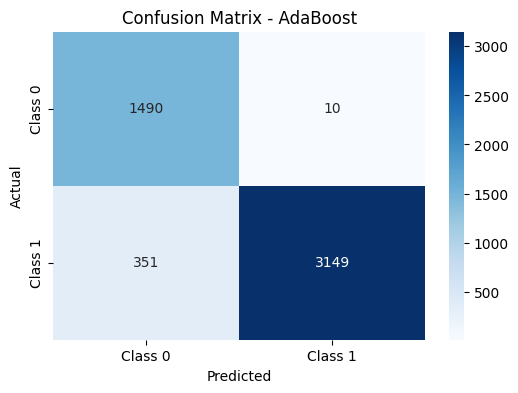

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    random_state=42
)

# Train the AdaBoost model
t1 = time.time()
adaboost_model = adaboost.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_adaboost = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = adaboost_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_adaboost = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_adaboost:.4f}s")
print(f"Testing Time: {time_test_adaboost:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.93
Training Time: 5.3482s
Testing Time: 0.0453s

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1500
           1       0.99      0.91      0.95      3500

    accuracy                           0.93      5000
   macro avg       0.91      0.95      0.92      5000
weighted avg       0.94      0.93      0.93      5000


Confusion Matrix:


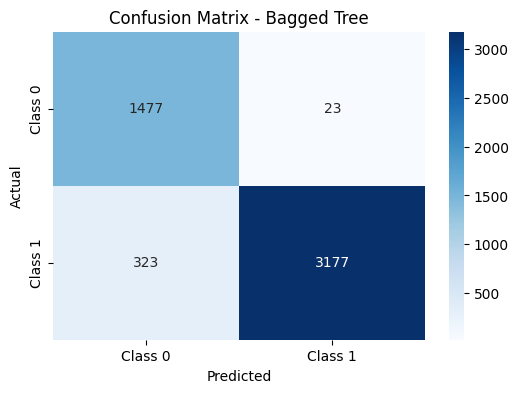

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Initialize Bagged Tree Classifier with Decision Tree as the base estimator
bagged_tree = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=10, random_state=42),  # Base estimator
    n_estimators=100,  # Number of trees
    max_samples=1.0,   # Fraction of samples for each tree
    max_features=1.0,  # Fraction of features for each tree
    bootstrap=True,    # Use bootstrap sampling
    random_state=42
)

# Train the Bagged Tree model
t1 = time.time()
bagged_tree_model = bagged_tree.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_bagged_tree = time.time() - t1

# Test the model
t1 = time.time()
y_test_pred = bagged_tree_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_bagged_tree = time.time() - t1

# Calculate accuracy and display metrics
print(f"Accuracy: {metrics.accuracy_score(test_data_y, y_test_pred):.2f}")
print(f"Training Time: {time_train_bagged_tree:.4f}s")
print(f"Testing Time: {time_test_bagged_tree:.4f}s")
print("\nClassification Report:")
print(classification_report(test_data_y, y_test_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_data_y, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Bagged Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 0.93
Training Time (Grid Search): 14121.5890s
Testing Time: 0.0137s

Classification Report (in percentages):
              precision  recall  f1-score    support
0                 82.10   99.07     89.79  150000.00
1                 99.56   90.74     94.95  350000.00
accuracy          93.24    0.93      0.93       0.93
macro avg          0.91    0.95      0.92    5000.00
weighted avg       0.94    0.93      0.93    5000.00

Confusion Matrix:
[[1486   14]
 [ 324 3176]]


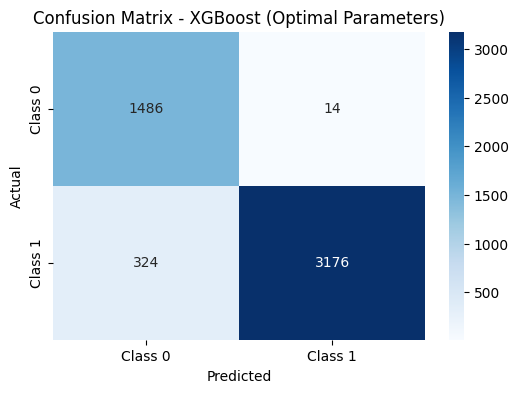

In [163]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],         # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (eta)
    'subsample': [0.8, 1.0],        # Fraction of samples to grow trees
}

# Initialize the XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Avoid deprecation warnings
    eval_metric='logloss'     # Evaluation metric
)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the model with Grid Search and measure time
t1 = time.time()
grid_search.fit(np.array(train_data_x).reshape(-1, 1), train_data_y)
time_train_grid = time.time() - t1

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Test the model with the optimal parameters
t1 = time.time()
y_test_pred = best_model.predict(np.array(test_data_x).reshape(-1, 1))
time_test_grid = time.time() - t1

# Calculate accuracy
accuracy_optimal = metrics.accuracy_score(test_data_y, y_test_pred)
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Training Time (Grid Search): {time_train_grid:.4f}s")
print(f"Testing Time: {time_test_grid:.4f}s")

# Generate the classification report as a dictionary
report = classification_report(test_data_y, y_test_pred, output_dict=True)

# Convert to a DataFrame for formatting
report_df = pd.DataFrame(report).transpose()

# Convert precision, recall, and f1-score to percentages and round to 2 decimal places
if len(report_df) > 3:  # Ensure there are class rows
    report_df.iloc[:-3, :] *= 100

# Explicitly handle accuracy as a percentage
if 'accuracy' in report_df.index:  # Prevent KeyError if 'accuracy' row exists
    report_df.loc['accuracy', 'precision'] *= 100  # Scale accuracy
    report_df.loc['accuracy', 'precision'] = round(report_df.loc['accuracy', 'precision'], 2)  # Round to 2 decimal places

# Round the rest of the DataFrame to 2 decimal places
report_df = report_df.round(2)

# Display the classification report
print("\nClassification Report (in percentages):")
print(report_df)

# Generate and display the confusion matrix
cm = confusion_matrix(test_data_y, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - XGBoost (Optimal Parameters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
actual_labels = np.array(test_data_y)
predicted_labels = np.array(y_test_pred)

correct_indices = np.where(actual_labels == predicted_labels)[0]
misclassified_indices = np.where(actual_labels != predicted_labels)[0]


filtered_indices0 = [idx for idx in correct_indices if 0 <= idx < 1500]
print(len(filtered_indices0))
filtered_indices1 = [idx for idx in correct_indices if 1500 <= idx < 3000]
print(len(filtered_indices1))
filtered_indices2 = [idx for idx in correct_indices if 3000 <= idx < 5000]
print(len(filtered_indices2))


1130
1191
1638


In [24]:
f1=pd.read_csv('Clean_BP_segments_UCI_pulseDB_SLP_vitalDB.csv', header=None)

In [25]:
dataset_test0c=f1[0:1500]
dataset_test1c=f1[1500:3000]
dataset_test2c=f1[3000:5000]

In [26]:
dataset_test0c

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,-0.514387,-0.519899,-0.523114,-0.525411,-0.529086,-0.532760,-0.535975,-0.537813,-0.537813,-0.535057,...,-0.236497,-0.116154,-0.028883,0.043231,0.107076,0.166329,0.222366,0.276107,0.326633,0.373484
1,0.412067,0.444219,0.477750,0.509903,0.538840,0.564103,0.584772,0.601767,0.614169,0.622437,...,0.662398,0.658723,0.652293,0.642647,0.630245,0.616006,0.600389,0.583394,0.565940,0.548486
2,0.531031,0.512659,0.492908,0.473616,0.455243,0.437789,0.421713,0.406555,0.392775,0.379914,...,0.392775,0.373024,0.354651,0.336738,0.319284,0.302748,0.286672,0.271055,0.256356,0.241658
3,0.226500,0.211343,0.195266,0.180109,0.165870,0.151631,0.137851,0.124071,0.109832,0.096053,...,0.653211,0.635757,0.615547,0.593040,0.568237,0.542514,0.516792,0.491530,0.466726,0.441923
4,0.418497,0.395991,0.373943,0.353733,0.334901,0.316068,0.296317,0.276567,0.258194,0.240739,...,0.388641,0.366594,0.345924,0.326173,0.306882,0.289428,0.272892,0.257275,0.243495,0.231094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.137706,-0.107327,-0.067017,-0.016190,0.043399,0.109415,0.178351,0.248457,0.315057,0.375814,...,-0.610332,-0.601569,-0.583458,-0.552495,-0.508679,-0.452011,-0.394174,-0.332832,-0.257469,-0.174511
1496,-0.088633,-0.004506,0.074946,0.147388,0.210483,0.263646,0.306878,0.340762,0.365299,0.378735,...,0.667919,0.707061,0.735688,0.750877,0.755551,0.753214,0.744451,0.720498,0.697714,0.669088
1497,0.619430,0.584377,0.546404,0.504925,0.444751,0.402688,0.356535,0.282925,0.234436,0.187699,...,0.410867,0.380488,0.347772,0.314472,0.281172,0.248457,0.217493,0.188867,0.161994,0.136288
1498,0.112920,0.090136,0.070273,0.052162,0.031715,0.012436,-0.004506,-0.019112,-0.031380,-0.042480,...,-0.101485,-0.114922,-0.127775,-0.140043,-0.152311,-0.164580,-0.175680,-0.185027,-0.193790,-0.203722


In [28]:
dataset_test_raw=pd.concat([dataset_test0c,dataset_test1c,dataset_test2c],axis=0)
#dataset_test_rawn=pd.concat([dataset_test0n,dataset_test1n,dataset_test2n],axis=0)

In [29]:
dataset_test_raw_clean=pd.concat([dataset_test_raw],axis=0)

In [30]:
dataset_test_raw_clean

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,-0.514387,-0.519899,-0.523114,-0.525411,-0.529086,-0.532760,-0.535975,-0.537813,-0.537813,-0.535057,...,-0.236497,-0.116154,-0.028883,0.043231,0.107076,0.166329,0.222366,0.276107,0.326633,0.373484
1,0.412067,0.444219,0.477750,0.509903,0.538840,0.564103,0.584772,0.601767,0.614169,0.622437,...,0.662398,0.658723,0.652293,0.642647,0.630245,0.616006,0.600389,0.583394,0.565940,0.548486
2,0.531031,0.512659,0.492908,0.473616,0.455243,0.437789,0.421713,0.406555,0.392775,0.379914,...,0.392775,0.373024,0.354651,0.336738,0.319284,0.302748,0.286672,0.271055,0.256356,0.241658
3,0.226500,0.211343,0.195266,0.180109,0.165870,0.151631,0.137851,0.124071,0.109832,0.096053,...,0.653211,0.635757,0.615547,0.593040,0.568237,0.542514,0.516792,0.491530,0.466726,0.441923
4,0.418497,0.395991,0.373943,0.353733,0.334901,0.316068,0.296317,0.276567,0.258194,0.240739,...,0.388641,0.366594,0.345924,0.326173,0.306882,0.289428,0.272892,0.257275,0.243495,0.231094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.391462,-0.400621,-0.409779,-0.418938,-0.423517,-0.428097,-0.430713,-0.437910,-0.437910,-0.437910,...,-0.140253,-0.161187,-0.182121,-0.205672,-0.229223,-0.252120,-0.273054,-0.296604,-0.317539,-0.336510
4996,-0.357444,-0.375761,-0.392116,-0.408471,-0.424826,-0.439218,-0.460806,-0.472582,-0.479778,-0.491553,...,-0.216793,-0.238382,-0.257353,-0.281558,-0.305109,-0.324080,-0.345669,-0.367257,-0.386883,-0.403237
4997,-0.424826,-0.439218,-0.453610,-0.470619,-0.480432,-0.492207,-0.503983,-0.511179,-0.518375,-0.523608,...,-0.085301,-0.091843,-0.100348,-0.118011,-0.130440,-0.145487,-0.165112,-0.182121,-0.203710,-0.225298
4998,-0.054564,-0.042309,-0.030699,-0.022314,-0.017799,-0.020379,-0.022314,-0.032634,-0.039084,-0.051339,...,0.684598,0.629129,0.571725,0.511740,0.453691,0.396286,0.340817,0.285348,0.231813,0.184729


In [31]:
correct_segments_0 = np.array(dataset_test_raw_clean)[filtered_indices0]  # Correct input data
correct_segments_1 = np.array(dataset_test_raw_clean)[filtered_indices1]
correct_segments_2 = np.array(dataset_test_raw_clean)[filtered_indices2]

In [32]:
print(len(correct_segments_0))
print(len(correct_segments_1))
print(len(correct_segments_2))

1130
1191
1638


In [33]:
final_correct_segments_clean012=np.concatenate((correct_segments_0,correct_segments_1,correct_segments_2), axis=0)

In [ ]:
df_final_correct_segments_clean012=pd. DataFrame(final_correct_segments_clean012)

In [ ]:
df_final_correct_segments_clean012=df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012

In [ ]:
df_final_correct_segments_clean012.to_csv('Clean_DT_good_quality_signals_TP.csv',header=None)